<a href="https://colab.research.google.com/github/toth235a/cracks/blob/main/Prediction_with_a_crack_segmentation_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction with a crack segmentation model (Mask2Former/ViT-adapter)
## Preparation
1. In the Runtime menu, click **Change runtime type** and choose **T4**. (This is the cheapest GPU, it may even be available for free, e.g. if you do not have colab pro.)
2. If you want to train another model (e.g. a smaller one), change the **repo_id** and/or **filename** variable in the last line of the cell below as appropriate.
3. Execute the cell which creates the **mm** environment and downloads the model. It will take ~5-10 minutes.

In [1]:
!pip install -q condacolab

from huggingface_hub import hf_hub_download
import condacolab

condacolab.install()
!conda create -n mm python=3.9
!source activate mm && \
  pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html && \
  pip install mmcv-full==1.4.2 -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html && \
  pip install timm==0.4.12 && \
  pip install mmdet==2.22.0 && \
  pip install mmsegmentation==0.20.2 && \
  pip install scipy==1.13.0 && \
  pip install yapf==0.40.1

!git clone https://github.com/toth235a/ViT-Adapter
!source activate mm &&  pip install setuptools==67 && cd ViT-Adapter/segmentation/ops && python setup.py build install

hf_hub_download(repo_id="toth235a/mask2former_vitadapter_crack", filename="mask2former_beitv2_896_public_crack.pth", local_dir="ViT-Adapter/segmentation/released")

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:08
🔁 Restarting kernel...
Channels:
 - conda-forge
Platform: linux-64
Solving environment: / - done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local/envs/mm

  added / updated specs:
    - python=3.9


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.2.2   |       hbcca054_0         152 KB  conda-forge
    ld_impl_linux-64-2.40      |       hf3520f5_1         691 KB  conda-forge
    libgcc-ng-13.2.0           |       h77fa898_7         758 KB  conda-forge
    libgo

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


mask2former_beitv2_896_public_crack.pth:   0%|          | 0.00/4.17G [00:00<?, ?B/s]

'ViT-Adapter/segmentation/released/mask2former_beitv2_896_public_crack.pth'

## Data upload
4. Execute the following cell and upload your images to segment.

In [1]:
from google.colab import files
import os

# Define the target directory
target_directory = "ViT-Adapter/segmentation/data"

# Ensure the target directory exists
os.makedirs(target_directory, exist_ok=True)

# Upload file
uploaded = files.upload()

# Move uploaded files to the target directory
for filename in uploaded.keys():
    destination_path = os.path.join(target_directory, filename)
    os.rename(filename, destination_path)

print(f"Files have been uploaded to {target_directory}")


Saving crack.png to crack.png
Files have been uploaded to ViT-Adapter/segmentation/data


## Prediction
4. In the following line, following **inference.py** you have:


*   a config file,
*   the model filename,
*   the folder of input images
*   (after **--out**) the output folder

Adapt those as appropriate and execute the cell. It will take a couple of minutes per image.






In [2]:
!source activate mm && CUDA_VISIBLE_DEVICES=0 python ViT-Adapter/segmentation/inference.py \
  ViT-Adapter/segmentation/configs/crack/mask2former_beitv2_896_public_crack.py \
  ViT-Adapter/segmentation/released/mask2former_beitv2_896_public_crack.pth \
  ViT-Adapter/segmentation/data \
  --out ViT-Adapter/segmentation/output \
  --palette crack

/content/ViT-Adapter/segmentation/mmseg_custom/models/losses/cross_entropy_loss.py:230: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(
load checkpoint from local path: ViT-Adapter/segmentation/released/mask2former_beitv2_896_public_crack.pth
/usr/local/envs/mm/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/envs/mm/lib/python3.9/site-packages/torch/nn/functional.py:3657: UserWarning: The default behavior for interpolate/upsample with float scale_fac

## Display
5. (optional) You can display the predictions by executing the following cell. Adapt the **output_folder** variable if necessary.

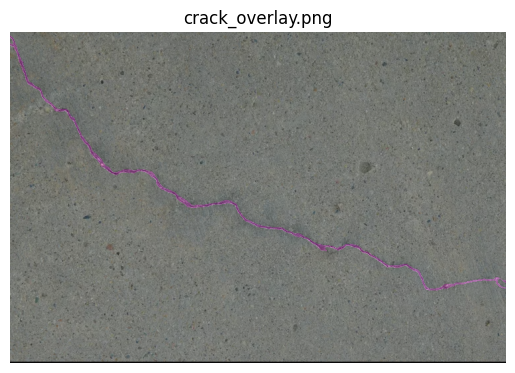

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os

# Directory containing the images
output_folder = 'ViT-Adapter/segmentation/output/'

# Find all files ending with _overlay.*
overlay_images = glob.glob(os.path.join(output_folder, '*_overlay.*'))

# Display each image
for image_path in overlay_images:
    img = mpimg.imread(image_path)
    base_filename = os.path.basename(image_path)
    plt.imshow(img)
    plt.title(base_filename)
    plt.axis('off')
    plt.show()


## Download
6. You can download the predictions by executing the following cell.


In [4]:
import shutil
import os
from google.colab import files

# Directory containing the images
output_folder = 'ViT-Adapter/segmentation/output/'

# Create a zip file of the output folder
shutil.make_archive('crack_predictions', 'zip', output_folder)

# Download the zip file to the local computer
files.download('crack_predictions.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Tips for debugging
Some common sources of errors (nothing groundbraking):

*   Your session crashes. In this case, you may not need to restart the whole thing. Check with the folder button whether the ViT-Adapter folder is still there. If it is there, you can try proceeding with the next cells (maybe you have to call some import statements again.)

*   Files are not found. Use the folder button in the left sidebar to find files. Don't forget that when you change the folder with the **cd folder** command, ***it only applies in the current cell***.
*   You are out of RAM, GPU RAM or disk space.  You can check them in **Runtime>View resources**. You can use a smaller model or a bigger GPU.
*   Library incompatibilities. Googling the error and/or downgrading the problematic libraries to an earlier version often helps.

Note that we are using ***two environments*** in the code above: the default, native environment of the Google colab notebook for downloading/uploading/displaying and a user defined one (**mm**) for running the model. To use the second, you have to prefix your commands with  **!source activate mm &&**, e.g. **!source activate mm && python train.py** or **!source activate mm && pip install pandas**.


If have access to a local GPU-equipped machine, you can try to run the model locally to find the bug.



